Forma del DataFrame: (1834, 34)


,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


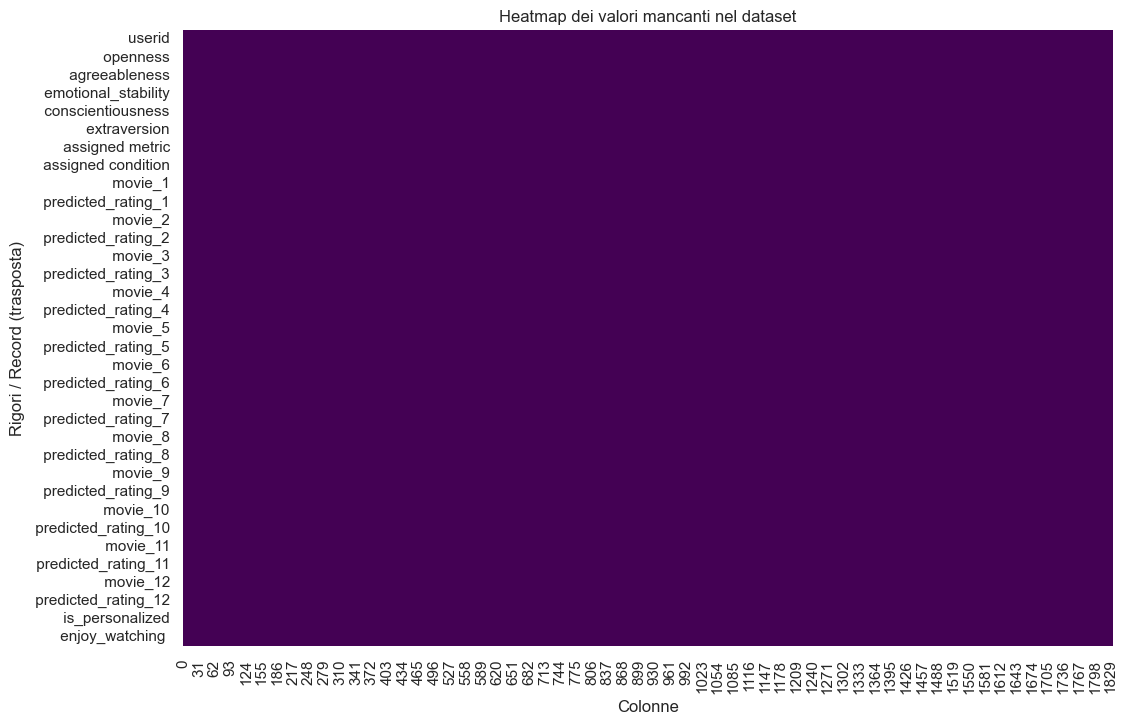

Almeno un valore mancante per colonna?:
userid                  False
 openness               False
 agreeableness          False
 emotional_stability    False
 conscientiousness      False
 extraversion           False
 assigned metric        False
 assigned condition     False
 movie_1                False
 predicted_rating_1     False
 movie_2                False
 predicted_rating_2     False
 movie_3                False
 predicted_rating_3     False
 movie_4                False
 predicted_rating_4     False
 movie_5                False
 predicted_rating_5     False
 movie_6                False
 predicted_rating_6     False
 movie_7                False
 predicted_rating_7     False
 movie_8                False
 predicted_rating_8     False
 movie_9                False
 predicted_rating_9     False
 movie_10               False
 predicted_rating_10    False
 movie_11               False
 predicted_rating_11    False
 movie_12               False
 predicted_rating_12    False


['userid',
 'openness',
 'agreeableness',
 'emotional_stability',
 'conscientiousness',
 'extraversion',
 'assigned_metric',
 'assigned_condition',
 'movie_1',
 'predicted_rating_1',
 'movie_2',
 'predicted_rating_2',
 'movie_3',
 'predicted_rating_3',
 'movie_4',
 'predicted_rating_4',
 'movie_5',
 'predicted_rating_5',
 'movie_6',
 'predicted_rating_6',
 'movie_7',
 'predicted_rating_7',
 'movie_8',
 'predicted_rating_8',
 'movie_9',
 'predicted_rating_9',
 'movie_10',
 'predicted_rating_10',
 'movie_11',
 'predicted_rating_11',
 'movie_12',
 'predicted_rating_12',
 'is_personalized',
 'enjoy_watching']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from collections import Counter


%matplotlib inline
sns.set(style="whitegrid")

# Caricamento del dataset da Kaggle
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "arslanali4343/top-personality-dataset",
    "2018-personality-data.csv"
)

# Verifica che il caricamento sia avvenuto
print("Forma del DataFrame:", df.shape)
display(df.head())

# Visualizzazione valori mancanti
plt.figure(figsize=(12, 8))
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax, cmap="viridis")

plt.xlabel("Colonne")
plt.ylabel("Rigori / Record (trasposta)")
plt.title("Heatmap dei valori mancanti nel dataset")
plt.show()

# Verifica testuale dei valori mancanti: restituisce True se almeno un valore mancante in ogni colonna
print("Almeno un valore mancante per colonna?:")
print(df.isna().any())

# Pulizia del dataset

print("\nColonne presenti:", df.columns.tolist())
print("Informazioni sul DataFrame:")
print(df.info())

# Rimozioni eventuali duplicati se ce ne sono
before = df.shape
df = df.drop_duplicates()
print("Prima drop_duplicates:", before, "Dopo:", df.shape)

# Standardizzazione dei nomi e delle colonne
# rimuove spazi iniziali/finali, converte in minuscolo, sostituisce spazi interni con underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Colonne standardizzate:", df.columns.tolist())

# Trasformazione di una colonna 'genres' se esiste
if 'genres' in df.columns:
    df['genres_list'] = df['genres'].astype(str).str.split('|')
    print("Colonna 'genres' trasformata in 'genres_list'.")
else:
    print("La colonna 'genres' non esiste. Si salta trasformazione generi.")


df.columns.tolist()




In [9]:
# vettori per il test
traits = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'emotional_stability']
user_vectors = df[traits].copy()
print("Primi vettori utenti:")
display(user_vectors.head())

#aggiungo il dataset dei film
movies = pd.read_csv('data/movies.csv')
print(movies.head())


movie_cols = [f'movie_{i}' for i in range(1, 13)]  # o quante ne hai


Primi vettori utenti:


,openness,conscientiousness,extraversion,agreeableness,emotional_stability
0,5.0,2.5,6.5,2.0,3.0
1,7.0,5.5,4.0,4.0,6.0
2,4.0,2.0,2.5,3.0,4.5
3,5.5,4.5,4.0,5.5,4.0
4,5.5,4.5,2.5,5.5,3.5


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [10]:
#COLLEGO I DUE DATASET

for col in movie_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
movies['movieId'] = pd.to_numeric(movies['movieId'], errors='coerce')

# Trasformo il dataframe: ogni (utente, film suggerito) diventa una riga
utenti_long = df.melt(id_vars=['userid'], value_vars=movie_cols, var_name='movie_slot', value_name='movieId')

# Unisco le info film tramite la colonna movieId
unione = utenti_long.merge(movies, how='left', on='movieId')

# Visualizza i primi risultati
print(unione.head())



                             userid movie_slot  movieId  \
0  8e7cebf9a234c064b75016249f2ac65e    movie_1    77658   
1  77c7d756a093150d4377720abeaeef76    movie_1    94959   
2  b7e8a92987a530cc368719a0e60e26a3    movie_1   110501   
3  92561f21446e017dd6b68b94b23ad5b7    movie_1     2905   
4  030001ac2145a938b07e686a35a2d638    movie_1     2905   

                              title                  genres  
0                     Cosmos (1980)             Documentary  
1           Moonrise Kingdom (2012)    Comedy|Drama|Romance  
2       The Raid 2: Berandal (2014)   Action|Crime|Thriller  
3  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  
4  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  


In [11]:

#PARTE DEL PREDICTED RATING (movie_slot=posizione dellla raccomandazione originale, predicted_rating=punteggio per quel suggerimento)
rating_cols = [f'predicted_rating_{i}' for i in range(1, 13)]
ratings_long = df.melt(id_vars=['userid'], value_vars=rating_cols, var_name='movie_slot', value_name='predicted_rating')

# Estraggo la posizione
utenti_long['movie_num'] = utenti_long['movie_slot'].str.extract(r'(\d+)')
ratings_long['movie_num'] = ratings_long['movie_slot'].str.extract(r'(\d+)')

# Unisco su userid con posizione
base = pd.merge(
    utenti_long, ratings_long[['userid', 'movie_num', 'predicted_rating']],
    how='left', on=['userid', 'movie_num']
)

finale = base.merge(movies, how='left', on='movieId')
print(finale.head())


                             userid movie_slot  movieId movie_num  \
0  8e7cebf9a234c064b75016249f2ac65e    movie_1    77658         1   
1  77c7d756a093150d4377720abeaeef76    movie_1    94959         1   
2  b7e8a92987a530cc368719a0e60e26a3    movie_1   110501         1   
3  92561f21446e017dd6b68b94b23ad5b7    movie_1     2905         1   
4  030001ac2145a938b07e686a35a2d638    movie_1     2905         1   

   predicted_rating                             title                  genres  
0          4.410466                     Cosmos (1980)             Documentary  
1          4.207280           Moonrise Kingdom (2012)    Comedy|Drama|Romance  
2          4.868064       The Raid 2: Berandal (2014)   Action|Crime|Thriller  
3          4.526371  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  
4          4.526371  Sanjuro (Tsubaki Sanjûrô) (1962)  Action|Adventure|Drama  


In [12]:
import json
with open('profilo_utente.json') as f:
    profilo_utente = json.load(f)


In [13]:
def similarita_coseno(profilo1, profilo2):
    keys = ['O','C','E','A','S']
    v1 = np.array([profilo1[k] for k in keys])
    v2 = np.array([profilo2[k] for k in keys])
    return np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def row_to_profilo(row):
    return {
        'O': row['openness'],
        'C': row['conscientiousness'],
        'E': row['extraversion'],
        'A': row['agreeableness'],
        'S': row['emotional_stability']
    }

# Calcolo la similarità e trova i top-N profili
df['similarita'] = df.apply(lambda r: similarita_coseno(profilo_utente, row_to_profilo(r)), axis=1)
df_simili = df.sort_values('similarita', ascending=False).head(10)

# Estraggo la lista dei film consigliati 
movie_cols = [f'movie_{i}' for i in range(1, 13)]
film_suggeriti = set()
for _, r in df_simili.iterrows():
    suggeriti = [r[m] for m in movie_cols if not pd.isnull(r[m])]
    film_suggeriti.update(suggeriti)
film_suggeriti = list(film_suggeriti)

# Unisco i dettagli dei film
risultato = movies[movies['movieId'].isin(film_suggeriti)][['movieId','title','genres']]
print(risultato.head())

     movieId                       title  \
0          1            Toy Story (1995)   
49        50  Usual Suspects, The (1995)   
108      110           Braveheart (1995)   
148      150            Apollo 13 (1995)   
159      161         Crimson Tide (1995)   

                                          genres  
0    Adventure|Animation|Children|Comedy|Fantasy  
49                        Crime|Mystery|Thriller  
108                             Action|Drama|War  
148                         Adventure|Drama|IMAX  
159                           Drama|Thriller|War  


In [ ]:
#FEEDBACK UTENTE

feedback = []
count_liked = 0   # film piaciuti

for idx, row in risultato.iterrows():
    if count_liked >= 5:
        break
    print(f"\nFilm suggerito: {row['title']}  -  {row['genres']}")
    risposta = None
    while risposta not in ['s', 'n']:
        risposta = input("Ti interessa questo film? [s/n]: ").lower().strip()
    liked = risposta == 's'
    feedback.append({
        'userid': 'testuser1',
        'movieId': row['movieId'],
        'feedback': 1 if liked else 0
    })
    if liked:
        count_liked += 1

import pandas as pd
df_feedback = pd.DataFrame(feedback)

# Film selezionati dall’utente (solo quelli con feedback 1)
film_selezionati = df_feedback[df_feedback['feedback']==1]['movieId'].tolist()
print("\nI tuoi film preferiti sono:")
print(risultato[risultato['movieId'].isin(film_selezionati)][['title','genres']])



Film suggerito: Toy Story (1995)  -  Adventure|Animation|Children|Comedy|Fantasy


In [22]:
#LISTA FINALE SUGGERIMENTI

import pandas as pd
from collections import Counter

# Preparo profilo utente
vec_user = np.array([
    profilo_utente['O'],
    profilo_utente['C'],
    profilo_utente['E'],
    profilo_utente['A'],
    profilo_utente['S']
])

def profilo_to_vec(row):
    return np.array([
        row['openness'], row['conscientiousness'], row['extraversion'], row['agreeableness'], row['emotional_stability']
    ])

def cosine_sim(u, v):
    if np.linalg.norm(u)==0 or np.linalg.norm(v)==0:
        return 0
    return np.dot(u, v) / (np.linalg.norm(u)*np.linalg.norm(v))

# -Calcolo similarità di personalità
df['sim_pers'] = df.apply(lambda r: cosine_sim(vec_user, profilo_to_vec(r)), axis=1)

# Prendo i top-N utenti più simili
N = 10  
vicini = df.sort_values('sim_pers', ascending=False).head(N)

# Colleziono tutti i film candidati dai vicini
movie_cols = [c for c in df.columns if c.startswith('movie_')]
film_candidati = set()
for _, row in vicini.iterrows():
    for m in movie_cols:
        film_candidati.add(row[m])
film_candidati = [f for f in film_candidati if not pd.isnull(f)]

# Elimino film già scelti o scartati nel passaggio del feedback 
film_candidati = [f for f in film_candidati if f not in film_selezionati + film_no]

# Sim score del film come media delle sim_pers degli utenti vicini che lo suggeriscono
film_personality_score = {}
for m in film_candidati:
    indices = [i for i, row in enumerate(vicini[movie_cols].values) if m in row]
    scores = vicini.iloc[indices]['sim_pers'].values if indices else [0]
    film_personality_score[m] = np.mean(scores)

# Match sui generi
generi_tutti = set()
for film_id in film_selezionati:
    generi = movies[movies['movieId'] == film_id]['genres'].values
    if generi.size > 0:
        generi_tutti.update(generi[0].split('|'))
generi_lista = sorted(list(generi_tutti))

def encode_generi(genres_string):
    gs = set(genres_string.split('|'))
    return np.array([int(g in gs) for g in generi_lista])

profilo_film_feedback = np.mean([
    encode_generi(movies[movies['movieId'] == film]['genres'].iloc[0])
    for film in film_selezionati
], axis=0)

# Valuto e combino le due similarità per ogni film candidato
dati_out = []
for m in film_candidati:
    if not m or pd.isnull(m):
        continue
    film_row = movies[movies['movieId']==m]
    if len(film_row)==0: continue
    genere_vec = encode_generi(film_row['genres'].iloc[0])
    sim_feedback = cosine_sim(genere_vec, profilo_film_feedback)
    sim_pers = film_personality_score[m]
    # Peso combinato (puoi variare)
    score = 0.5*sim_feedback + 0.5*sim_pers
    dati_out.append({
        'movieId': m,
        'title': film_row['title'].iloc[0],
        'genres': film_row['genres'].iloc[0],
        'sim_feedback': sim_feedback,
        'sim_personality': sim_pers,
        'score': score
    })



finale = pd.DataFrame(dati_out).sort_values('score', ascending=False).head(10)
print(finale[['title', 'genres', 'sim_feedback', 'sim_personality', 'score']])

                                                title  \
89                        Bourne Identity, The (1988)   
65                City of God (Cidade de Deus) (2002)   
91                                   Gladiator (2000)   
31  Legend of the Red Dragon (a.k.a. New Legend of...   
58              Fear and Loathing in Las Vegas (1998)   
47                                 Man on Fire (2004)   
56                                          Up (2009)   
43                                   Star Trek (2009)   
2                                       Munich (2005)   
7                                Lone Survivor (2013)   

                                     genres  sim_feedback  sim_personality  \
89  Action|Adventure|Drama|Mystery|Thriller      0.808736         0.997594   
65    Action|Adventure|Crime|Drama|Thriller      0.808736         0.997418   
91                   Action|Adventure|Drama      0.759326         0.997923   
31    Action|Adventure|Comedy|Drama|Romance      0.759326   